In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("../data/btcusdt.csv")
df

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2022-07-14 14:42:00,19970.23,19976.38,19961.92,19969.78,54.23882,1657780979999,1.083113e+06,2086,25.42902,5.078110e+05,0
1,2022-07-14 14:43:00,19969.78,19988.07,19966.83,19981.67,76.44766,1657781039999,1.527254e+06,2569,42.97334,8.585345e+05,0
2,2022-07-14 14:44:00,19979.52,20001.43,19977.89,20000.75,76.81600,1657781099999,1.535827e+06,2402,41.71792,8.341394e+05,0
3,2022-07-14 14:45:00,19998.08,20054.66,19998.07,20041.96,231.96826,1657781159999,4.646698e+06,5870,142.64732,2.857418e+06,0
4,2022-07-14 14:46:00,20041.96,20064.88,20033.21,20036.43,138.45879,1657781219999,2.775858e+06,3948,73.39213,1.471429e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-07-15 23:56:00,20851.75,20854.06,20830.30,20839.44,59.04577,1657900619999,1.230599e+06,2489,30.08875,6.271038e+05,0
1996,2022-07-15 23:57:00,20841.31,20842.00,20812.00,20814.05,56.00447,1657900679999,1.166369e+06,2358,24.57709,5.118785e+05,0
1997,2022-07-15 23:58:00,20814.05,20817.98,20783.89,20788.67,246.16047,1657900739999,5.119846e+06,4757,99.75851,2.074993e+06,0
1998,2022-07-15 23:59:00,20785.52,20803.22,20777.00,20792.19,110.59637,1657900799999,2.299633e+06,3442,59.21621,1.231400e+06,0


The trading strategy is simple:
- Long the stock if the shorter SMA > longer SMA
- Short  the stock if the shorter SMA < longer SMA

In [8]:
short_sma = 30
long_sma = 240

In [10]:
df['SMA1'] = df['Close'].rolling(short_sma).mean()
df['SMA2'] = df['Close'].rolling(long_sma).mean()
# drop the rows with NaN entries
df.dropna(inplace=True)
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore,SMA1,SMA2
239,2022-07-14 18:41:00,19819.83,19852.41,19802.00,19824.08,254.56426,1657795319999,5.047963e+06,5258,130.66956,2.591517e+06,0,19797.650667,19888.350583
240,2022-07-14 18:42:00,19824.08,19836.97,19820.64,19830.71,82.39661,1657795379999,1.633746e+06,2641,39.34827,7.801870e+05,0,19798.894000,19887.771125
241,2022-07-14 18:43:00,19830.71,19836.68,19818.69,19825.45,54.81905,1657795439999,1.086881e+06,2104,27.48304,5.449191e+05,0,19800.099000,19887.120208
242,2022-07-14 18:44:00,19823.61,19831.69,19811.20,19827.66,62.91445,1657795499999,1.247087e+06,1951,35.24781,6.987451e+05,0,19800.763333,19886.399000
243,2022-07-14 18:45:00,19826.32,19845.06,19809.15,19838.40,98.52746,1657795559999,1.953348e+06,3105,55.58063,1.102057e+06,0,19803.275333,19885.550833


In [11]:
df['Position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)

In [12]:
df

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore,SMA1,SMA2,Position
239,2022-07-14 18:41:00,19819.83,19852.41,19802.00,19824.08,254.56426,1657795319999,5.047963e+06,5258,130.66956,2.591517e+06,0,19797.650667,19888.350583,-1
240,2022-07-14 18:42:00,19824.08,19836.97,19820.64,19830.71,82.39661,1657795379999,1.633746e+06,2641,39.34827,7.801870e+05,0,19798.894000,19887.771125,-1
241,2022-07-14 18:43:00,19830.71,19836.68,19818.69,19825.45,54.81905,1657795439999,1.086881e+06,2104,27.48304,5.449191e+05,0,19800.099000,19887.120208,-1
242,2022-07-14 18:44:00,19823.61,19831.69,19811.20,19827.66,62.91445,1657795499999,1.247087e+06,1951,35.24781,6.987451e+05,0,19800.763333,19886.399000,-1
243,2022-07-14 18:45:00,19826.32,19845.06,19809.15,19838.40,98.52746,1657795559999,1.953348e+06,3105,55.58063,1.102057e+06,0,19803.275333,19885.550833,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-07-15 23:56:00,20851.75,20854.06,20830.30,20839.44,59.04577,1657900619999,1.230599e+06,2489,30.08875,6.271038e+05,0,20854.967667,20905.344500,-1
1996,2022-07-15 23:57:00,20841.31,20842.00,20812.00,20814.05,56.00447,1657900679999,1.166369e+06,2358,24.57709,5.118785e+05,0,20852.337333,20905.556375,-1
1997,2022-07-15 23:58:00,20814.05,20817.98,20783.89,20788.67,246.16047,1657900739999,5.119846e+06,4757,99.75851,2.074993e+06,0,20849.683000,20905.641250,-1
1998,2022-07-15 23:59:00,20785.52,20803.22,20777.00,20792.19,110.59637,1657900799999,2.299633e+06,3442,59.21621,1.231400e+06,0,20847.222667,20905.734792,-1


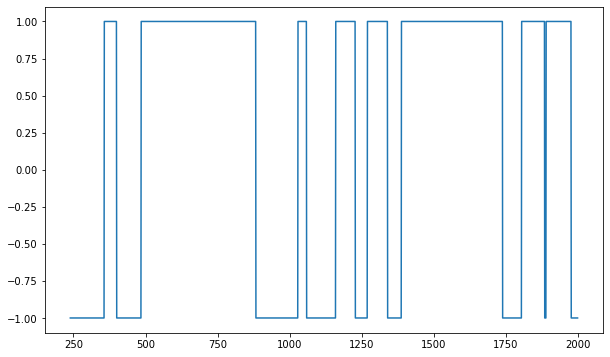

In [20]:
ax = df['Position'].plot(figsize=(10,6))